In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors

/Users/mburq/miniconda3/envs/tesorai/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Custom CMAP
# 1. Get the original colormap
original_cmap = plt.get_cmap("RdBu")

# 2. Define anchor points and sample original colors at key locations
# We need the Red at 0.0, orange at 0.5, and Green at 1.0 from the original map
nodes = [0.0, 0.1, 0.45, 0.70, 0.8, 0.9, 1.0]
colors_at_key_points = original_cmap([0.0, 0.25, 0.5, 0.75, 1.0])  # Get RGBA values

# Define the colors corresponding to our desired nodes
node_colors = [
    colors_at_key_points[0],
    colors_at_key_points[0],
    colors_at_key_points[1],
    colors_at_key_points[2],
    colors_at_key_points[3],
    colors_at_key_points[4],
    colors_at_key_points[4],
]

# 3. Construct the colormap dictionary (cdict)
# Each color channel (red, green, blue) needs its own list of anchor points.
cdict = {"red": [], "green": [], "blue": []}  # Alpha is ignored here but could be added

for i, node in enumerate(nodes):
    rgba = node_colors[i]
    cdict["red"].append((node, rgba[0], rgba[0]))
    cdict["green"].append((node, rgba[1], rgba[1]))
    cdict["blue"].append((node, rgba[2], rgba[2]))

# 4. Create the new custom colormap
custom_cmap = mcolors.LinearSegmentedColormap("custom_RdYlGn", cdict)

/var/folders/zr/y2f48cyx1w38xhxgnwgmtc880000gn/T/ipykernel_48287/3883104538.py:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=df.applymap(lambda x: f"{x:.0f}%" if not pd.isna(x) else ""),


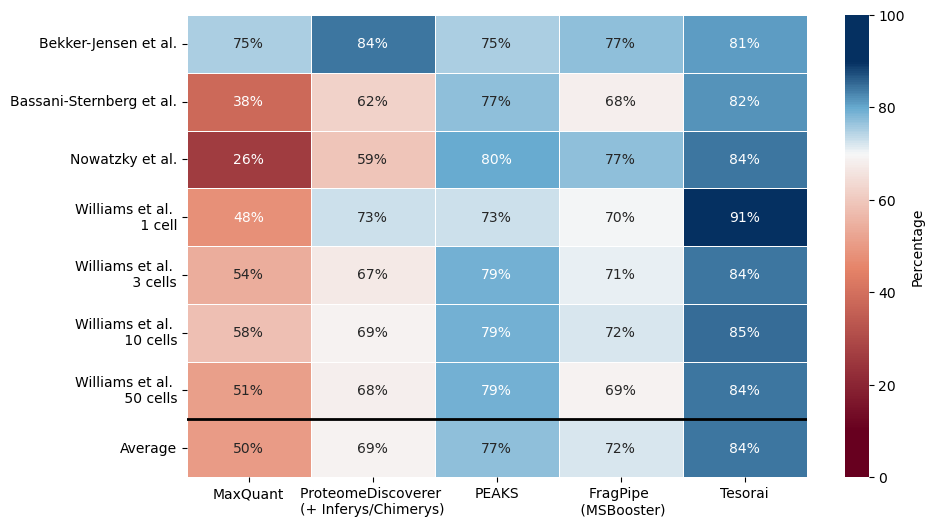

In [3]:
data = {
    "MaxQuant": [75, 38, 26, 48, 54, 58, 51, 50],
    # "Prosit": [68, 65, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    "ProteomeDiscoverer \n(+ Inferys/Chimerys)": [84, 62, 59, 73, 67, 69, 68, 69],
    "PEAKS": [75, 77, 80, 73, 79, 79, 79, 77],
    "FragPipe \n (MSBooster)": [77, 68, 77, 70, 71, 72, 69, 72],
    "Tesorai": [81, 82, 84, 91, 84, 85, 84, 84],
}

# Convert to DataFrame
df = pd.DataFrame(
    data,
    index=[
        "Bekker-Jensen et al.",
        "Bassani-Sternberg et al.",
        "Nowatzky et al.",
        "Williams et al. \n 1 cell",
        "Williams et al. \n 3 cells",
        "Williams et al. \n 10 cells",
        "Williams et al. \n 50 cells",
        "Average",
    ],
)


# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    df,
    annot=df.applymap(lambda x: f"{x:.0f}%" if not pd.isna(x) else ""),
    cmap=custom_cmap,
    cbar=True,
    cbar_kws={"label": "Percentage"},
    fmt="",
    linewidths=0.5,
    vmin=0,
    vmax=100,
)

# Add a line to separate the last row
plt.axhline(y=len(df) - 1, color="black", linewidth=2)

cbar = plt.gca().collections[0].colorbar
plt.show()